In [1]:
import numpy as np
import datetime as datetime
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))

## Retrieve data for multiple of stocks

In [2]:
from pandas_datareader import data, wb

#settings
stocks = ['AGN.AS']
extra_features = ['EUR=X','NDAQ','^DJI','^AEX']
#start = datetime.datetime(2010, 1, 1)
start = datetime.datetime(2007, 1, 1)
end = datetime.datetime(2016, 12, 20)
    
all_data = {}
for ticker in stocks + extra_features:
    try:
        all_data[ticker] = data.DataReader(ticker, 'yahoo', start , end )

    except:
        print "Cant find ", ticker

In [3]:
all_data['AGN.AS'].describe()

Open         High          Low        Close           Volume  \
count  2598.000000  2598.000000  2598.000000  2598.000000      2598.000000   
mean      5.863433     5.941301     5.769296     5.854889  11830618.013857   
std       2.659205     2.670797     2.639201     2.654115   7472719.442487   
min       1.900000     1.995000     1.827000     1.848000         0.000000   
25%       4.380500     4.448000     4.297750     4.366000   7235100.000000   
50%       5.050000     5.119000     4.966000     5.035500  10222600.000000   
75%       6.407750     6.482000     6.356750     6.400000  14309650.000000   
max      16.100000    16.130000    15.910000    16.060000  86865800.000000   

         Adj Close  
count  2598.000000  
mean      4.708799  
std       1.886680  
min       1.432380  
25%       3.431360  
50%       4.138445  
75%       5.540455  
max      11.399230

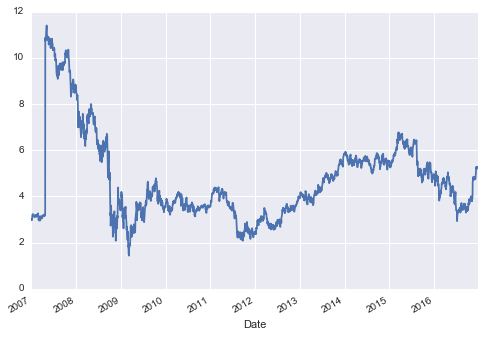

In [4]:
all_data['AGN.AS']['Adj Close'].plot()

## Generate features

In [5]:
stock = 'AGN.AS'

### Functions

In [6]:
def simpleMovingAverage(stock,window = 50):
    all_data[stock]['SMA'+str(window)] = pd.rolling_mean(all_data[stock]['Adj Close'],window)

In [7]:
def bollingerBands(stock,window = 20):
    all_data[stock]['Bol_upper'] = pd.rolling_mean(all_data[stock]['Adj Close'], window=window) + 2* pd.rolling_std(all_data[stock]['Adj Close'], window)
    all_data[stock]['Bol_lower'] = pd.rolling_mean(all_data[stock]['Adj Close'], window=window) - 2* pd.rolling_std(all_data[stock]['Adj Close'], window)

In [8]:
def RSI(stock, window = 7):
    tmpDf = pd.DataFrame()
    tmpDf['Up']= all_data[stock]['Adj Close'].diff().apply(lambda x:x if x>0 else 0)
    tmpDf['Down']= all_data[stock]['Adj Close'].diff().apply(lambda x:-x if x<0 else 0)
    
    tmpDf['UpAvg']= pd.rolling_mean(tmpDf['Up'], window=window) 
    tmpDf['DownAvg']= pd.rolling_mean(tmpDf['Down'], window=window) 

    all_data[stock]['RSI'] = 100-(100/(1+tmpDf['UpAvg']/tmpDf['DownAvg']))


In [9]:
def otherMarketsOrStocksFeatures(stock):
    for feature in extra_features:
        all_data[stock][feature] = all_data[feature]['Open']

In [10]:
def percentChangeLastPeriod(stock, days_back = 7):
    all_data[stock]['percent_changed_since_'+str(days_back)+'_days'] = (all_data[stock]['Adj Close'] - all_data[stock]['Adj Close'].shift(days_back)) / all_data[stock]['Adj Close'].shift(days_back)

### Apply functions to dataFrame

In [11]:
bollingerBands(stock,window=2)
simpleMovingAverage(stock,window=2)
RSI(stock,4)
percentChangeLastPeriod(stock,2)
otherMarketsOrStocksFeatures(stock)
bollingerBands(stock,window=20)
bollingerBands(stock,window=60)
simpleMovingAverage(stock,window=7)
simpleMovingAverage(stock,window=30)
simpleMovingAverage(stock,window=180)
RSI(stock,7)
RSI(stock,30)
percentChangeLastPeriod(stock,7)
percentChangeLastPeriod(stock,30)
percentChangeLastPeriod(stock,60)
otherMarketsOrStocksFeatures(stock)

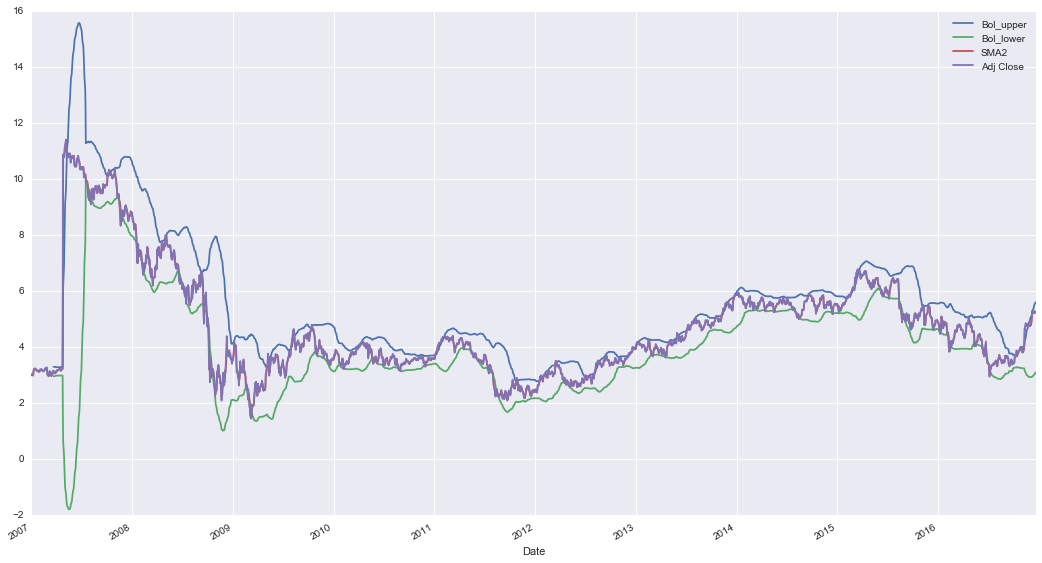

In [12]:
all_data[stock][['Bol_upper','Bol_lower','SMA2','Adj Close']].plot(figsize=(18,10))

In [13]:
all_data[stock].describe()

Open         High          Low        Close           Volume  \
count  2598.000000  2598.000000  2598.000000  2598.000000      2598.000000   
mean      5.863433     5.941301     5.769296     5.854889  11830618.013857   
std       2.659205     2.670797     2.639201     2.654115   7472719.442487   
min       1.900000     1.995000     1.827000     1.848000         0.000000   
25%       4.380500     4.448000     4.297750     4.366000   7235100.000000   
50%       5.050000     5.119000     4.966000     5.035500  10222600.000000   
75%       6.407750     6.482000     6.356750     6.400000  14309650.000000   
max      16.100000    16.130000    15.910000    16.060000  86865800.000000   

         Adj Close    Bol_upper    Bol_lower         SMA2          RSI  \
count  2598.000000  2539.000000  2539.000000  2597.000000  2569.000000   
mean      4.708799     5.478290     3.976723     4.709029    50.958073   
std       1.886680     2.256825     1.810005     1.884381    12.226820   
min       1.432380     2.749152    -1.804852     1.466100    17.792627   
25%       3.431360     3.996490     2.945770     3.438860    42.945038   
50%       4.138445     4.778816     3.609206     4.134380    50.116260   
75%       5.540455     6.001804     5.151441     5.541360    58.620855   
max      11.399230    15.560154    10.014857    11.367290    96.606794   

                   ...                      EUR=X         NDAQ          ^DJI  \
count              ...                2573.000000  2509.000000   2509.000000   
mean               ...                   0.769935    34.698625  13596.838755   
std                ...                   0.076314    14.177171   3028.034270   
min                ...                   0.625710    16.250000   6547.009766   
25%                ...                   0.723180    23.400000  11406.160156   
50%                ...                   0.753060    31.200001  13090.110352   
75%                ...                   0.798150    42.560001  16451.179688   
max                ...                   0.961100    71.879997  19909.009766   

              ^AEX         SMA7        SMA30       SMA180  \
count  2553.000000  2592.000000  2569.000000  2419.000000   
mean    384.822711     4.710170     4.715927     4.712640   
std      79.948139     1.876563     1.843443     1.640256   
min     199.339996     1.696027     2.154310     2.644224   
25%     327.410004     3.448108     3.478478     3.616370   
50%     374.609985     4.131720     4.156932     4.103564   
75%     446.679993     5.543743     5.546386     5.518193   
max     563.469971    11.147761    10.872801     9.851044   

       percent_changed_since_7_days  percent_changed_since_30_days  \
count                   2591.000000                    2568.000000   
mean                       0.007869                       0.031074   
std                        0.149066                       0.304411   
min                       -0.421959                      -0.590307   
25%                       -0.035225                      -0.068591   
50%                        0.001106                       0.000714   
75%                        0.039203                       0.074358   
max                        2.481928                       2.702503   

       percent_changed_since_60_days  
count                    2538.000000  
mean                        0.055498  
std                         0.415063  
min                        -0.666875  
25%                        -0.110875  
50%                         0.002294  
75%                         0.116969  
max                         2.653623  

[8 rows x 21 columns]

## Create lagged return features

In [14]:
transaction_cost = 2.20 * 2 #https://www.degiro.nl/tarieven/

In [15]:
def createPredictionMatrix(stock, days_ahead):
    all_data[stock]['Y'] = all_data[stock]['Adj Close'].shift(-days_ahead)

In [16]:
createPredictionMatrix(stock,20)

## Drop non-relevant columns

In [17]:
#all_data[stock].describe()
non_relevant_columns = ['High','Low','Close','Volume']
all_data[stock].drop(non_relevant_columns,axis=1,inplace=True)


In [18]:
all_data[stock].tail(8)

Open  Adj Close  Bol_upper  Bol_lower    SMA2        RSI  \
Date                                                                    
2016-12-09  5.300      5.210   5.305796   2.948204  5.2410  74.707071   
2016-12-12  5.225      5.217   5.352354   2.963412  5.2135  76.599257   
2016-12-13  5.210      5.216   5.395920   2.981013  5.2165  77.624425   
2016-12-14  5.220      5.192   5.437148   2.996919  5.2040  80.311553   
2016-12-15  5.240      5.242   5.480127   3.011273  5.2170  80.165650   
2016-12-16  5.243      5.274   5.523208   3.025592  5.2580  82.459233   
2016-12-19  5.257      5.219   5.556742   3.051358  5.2465  79.566982   
2016-12-20  5.204      5.250   5.586800   3.084234  5.2345  79.704301   

            percent_changed_since_2_days   EUR=X       NDAQ          ^DJI  \
Date                                                                        
2016-12-09                     -0.006105  0.9415  68.000000  19631.349609   
2016-12-12                     -0.010432  0.9482  68.230003  19770.199219   
2016-12-13                      0.001152  0.9396  69.000000  19852.210938   
2016-12-14                     -0.004792  0.9407  68.949997  19876.130859   
2016-12-15                      0.004985  0.9510  68.410004  19811.500000   
2016-12-16                      0.015794  0.9599  68.589996  19909.009766   
2016-12-19                     -0.004388  0.9571  67.919998  19836.660156   
2016-12-20                     -0.004551  0.9611        NaN           NaN   

                  ^AEX      SMA7     SMA30    SMA180  \
Date                                                   
2016-12-09  467.040009  5.029571  4.595667  3.979906   
2016-12-12  470.839996  5.091286  4.638633  3.984093   
2016-12-13  470.690002  5.157000  4.682667  3.989080   
2016-12-14  472.549988  5.192143  4.729367  3.993882   
2016-12-15  473.519989  5.227286  4.775500  3.999081   
2016-12-16  476.579987  5.231857  4.824600  4.003850   
2016-12-19  477.760010  5.224286  4.868300  4.007590   
2016-12-20         NaN  5.230000  4.912500  4.011216   

            percent_changed_since_7_days  percent_changed_since_30_days  \
Date                                                                      
2016-12-09                      0.085869                       0.306747   
2016-12-12                      0.090282                       0.328157   
2016-12-13                      0.096720                       0.339153   
2016-12-14                      0.049737                       0.369559   
2016-12-15                      0.049239                       0.358735   
2016-12-16                      0.006105                       0.387530   
2016-12-19                     -0.010053                       0.335466   
2016-12-20                      0.007678                       0.337920   

            percent_changed_since_60_days   Y  
Date                                           
2016-12-09                       0.581184 NaN  
2016-12-12                       0.550832 NaN  
2016-12-13                       0.542739 NaN  
2016-12-14                       0.492812 NaN  
2016-12-15                       0.488359 NaN  
2016-12-16                       0.484797 NaN  
2016-12-19                       0.517151 NaN  
2016-12-20                       0.561570 NaN

In [19]:
y = all_data[stock].dropna(how='any',inplace=False)['Y']
X = all_data[stock].dropna(how='any',inplace=False).drop(['Y','Adj Close'],axis=1)

## Machine Learning - Finding the best model

from tpot import TPOTRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.75, test_size=0.25)

tpot = TPOTRegressor(generations=5, population_size=20, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_'+stock+'_pipeline.py')

## Machine learning - model usage

In [ ]:
train_size = int(len(X)*0.80)
training_features = X.iloc[:train_size]
testing_features = X.iloc[train_size:]

training_classes = y.iloc[:train_size]
testing_classes = y.iloc[train_size:]

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import FunctionTransformer, RobustScaler

#train_test_split(X, y,train_size=0.66, test_size=0.34)

reg = ExtraTreesRegressor(criterion='mae', max_features=1.0, n_estimators=500,verbose=1)
reg.fit(training_features, training_classes)

In [ ]:
prediction = reg.predict(testing_features)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print mean_absolute_error(testing_classes, prediction)
print r2_score(testing_classes, prediction)

In [ ]:
sample = all_data[stock].sample(5)
test = sample.drop('Y',axis=1,inplace=False)


In [ ]:
testing_classes[:20]



In [ ]:
prediction[:20]


In [ ]:
np.mean(abs(prediction-testing_classes))